In [300]:
import pandas as pd

In [301]:
import numpy as np

In [302]:
import seaborn as sns

In [303]:
import matplotlib.pyplot as plt

In [304]:
import warnings

In [305]:
df_Test = pd.read_csv('test.csv')

In [306]:
df_Test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [307]:
df_Train = pd.read_excel('train.xlsx')

In [308]:
df_Train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [309]:
df_Train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [310]:
df_Test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

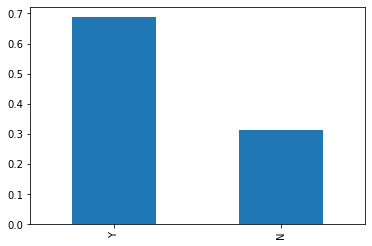

In [311]:
df_Train['Loan_Status'].value_counts(normalize=True).plot.bar()

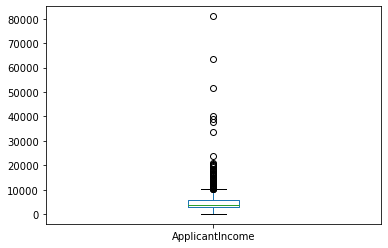

In [312]:
df_Train['ApplicantIncome'].plot.box()

In [313]:
Credit_History = pd.crosstab(df_Train['Credit_History'],df_Train['Loan_Status'])

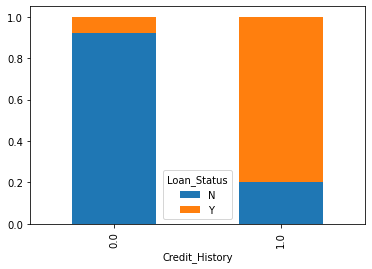

In [314]:
Credit_History.div(Credit_History.sum(1), axis=0).plot(kind='bar',stacked=True)
plt.show()

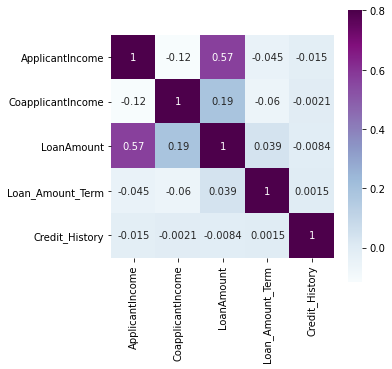

In [315]:
heatMatrix = df_Train.corr()
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(heatMatrix,vmax=.8,square=True,cmap='BuPu',annot = True)

In [316]:
df_Train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [317]:
df_Test['Gender'].fillna(df_Train['Gender'].mode()[0], inplace=True)
df_Test['Married'].fillna(df_Train['Married'].mode()[0], inplace=True)
df_Test['Dependents'].fillna(df_Train['Dependents'].mode()[0], inplace=True)
df_Test['Self_Employed'].fillna(df_Train['Self_Employed'].mode()[0], inplace=True)
df_Test['Credit_History'].fillna(df_Train['Credit_History'].mode()[0], inplace=True)
df_Test['Loan_Amount_Term'].fillna(df_Train['Loan_Amount_Term'].mode()[0], inplace=True)
df_Test['LoanAmount'].fillna(df_Train['LoanAmount'].median(), inplace=True)

In [318]:
df_Train['Gender'].fillna(df_Train['Gender'].mode()[0], inplace=True)
df_Train['Married'].fillna(df_Train['Married'].mode()[0], inplace=True)
df_Train['Dependents'].fillna(df_Train['Dependents'].mode()[0], inplace=True)
df_Train['Self_Employed'].fillna(df_Train['Self_Employed'].mode()[0], inplace=True)
df_Train['Credit_History'].fillna(df_Train['Credit_History'].mode()[0], inplace=True)
df_Train['Loan_Amount_Term'].fillna(df_Train['Loan_Amount_Term'].mode()[0], inplace=True)
df_Train['LoanAmount'].fillna(df_Train['LoanAmount'].median(), inplace=True)

In [319]:
df_Train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

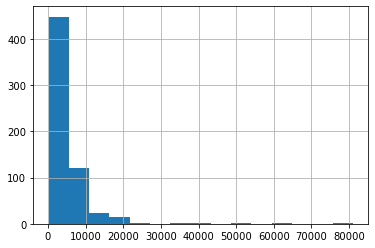

In [320]:
df_Train['ApplicantIncome'].hist(bins=15)

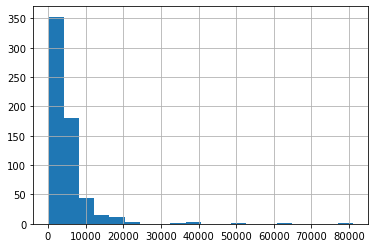

In [321]:
df_Train['ApplicantIncome'].hist(bins=20)

In [322]:
df_Train['LoanAmountLog'] = np.log(df_Train['LoanAmount'])
df_Train['CoapplicantIncomeLog'] = np.log(df_Train['CoapplicantIncome'])
df_Train['ApplicantIncomeLog'] = np.log(df_Train['ApplicantIncome'])

F:\ana\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [323]:
df_Train.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
LoanAmountLog           0
CoapplicantIncomeLog    0
ApplicantIncomeLog      0
dtype: int64

In [324]:
x = df_Train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'CoapplicantIncomeLog', 'ApplicantIncomeLog',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 
       'LoanAmountLog']].values
y = df_Train[['Loan_Status']].values

In [325]:
#df_Test = pd.get_dummies(df_Test)
#df_Train = pd.get_dummies(df_Train)

In [326]:
df_Train


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,CoapplicantIncomeLog,ApplicantIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,-inf,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,7.318540,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,-inf,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,7.765569,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,-inf,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,-inf,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,-inf,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,5.480639,8.996157
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,-inf,8.933664


In [327]:
x

array([['Male', 'No', 0, ..., 1.0, 'Urban', 4.852030263919617],
       ['Male', 'Yes', 1, ..., 1.0, 'Rural', 4.852030263919617],
       ['Male', 'Yes', 0, ..., 1.0, 'Urban', 4.189654742026425],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 'Urban', 5.53338948872752],
       ['Male', 'Yes', 2, ..., 1.0, 'Urban', 5.231108616854587],
       ['Female', 'No', 0, ..., 0.0, 'Semiurban', 4.890349128221754]],
      dtype=object)

In [328]:
y

array([['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['Y'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['N'],
       ['Y'],
       ['Y'],
       ['N'],
       ['Y'],
      

In [329]:
df_Train = df_Train.drop('Loan_ID',1)

In [330]:
df_Test = df_Test.drop('Loan_ID',1)
x = df_Train.drop('Loan_Status',1)
y = df_Train.Loan_Status

In [331]:
x = pd.get_dummies(x)

In [332]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmountLog,CoapplicantIncomeLog,ApplicantIncomeLog,Gender_Female,Gender_Male,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,-inf,8.674026,0,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,7.318540,8.430109,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,-inf,8.006368,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,7.765569,7.856707,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,-inf,8.699515,0,1,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,4.262680,-inf,7.972466,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,3.688879,-inf,8.320205,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,5.533389,5.480639,8.996157,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,5.231109,-inf,8.933664,0,1,...,0,1,0,1,0,1,0,0,0,1


In [333]:
df_Train=pd.get_dummies(df_Train)
df_Test=pd.get_dummies(df_Test)

In [371]:
le = 0.783654

In [382]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size=0.3)

In [383]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
accuracy = le

In [384]:
x_train.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
LoanAmountLog              float64
CoapplicantIncomeLog       float64
ApplicantIncomeLog         float64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [385]:
x_train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
LoanAmountLog              0
CoapplicantIncomeLog       0
ApplicantIncomeLog         0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [386]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [389]:
x_train = clean_dataset(x_train)

In [ ]:
model.fit(x_train,y_train)
LogisticRegression()

In [ ]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

In [390]:
accuracy

0.783654